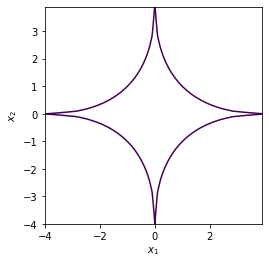

In [1]:
#B2 c
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

x = y = np.arange(-4, 4, 0.1)
x, y = np.meshgrid(x,y)
plt.contour(x, y, (abs(x)**(1/2) + abs(y)**(1/2))**2, [4]) 
plt.axis('scaled')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [2]:
"""
Created on Sat May  9 22:49:19 2020
CSE 546 HW2 B4
@author: Leah
"""
import numpy as np
from mnist import MNIST
import torch
import torch.nn.functional as F #softmax

def load_dataset():
    mndata = MNIST('./data/')
    X_train, labels_train = map(np.array, mndata.load_training()) 
    X_test, labels_test = map(np.array, mndata.load_testing()) 
    X_train = X_train/255.0
    X_test = X_test/255.0
   
    return X_train, labels_train, X_test, labels_test

#LOAD data
X_train, y_train, X_test, y_test = load_dataset()  

In [3]:
def onehot(X):
    '''
    For each yi let yi be the one-hot encoding of yi (i.e., yi ∈ {0, 1}^k is a 
    vector of all zeros aside from a 1 in the yith index).
    k = 10
    '''
    n_classes = 10
    ## transform labels_train(n-by-1) into n-by-k
    Y = np.zeros((len(X),n_classes))
    for i in range(0,len(Y)):
        Y[i,X[i]] = 1
    return Y

In [4]:
# =============================================================================
# main
# =============================================================================

X_train = torch.tensor(X_train)
X_test = torch.tensor(X_test)
y_test = torch.tensor(y_test)
y_train = torch.tensor(y_train)
y_train = y_train.long()


In [8]:
# =============================================================================
# J(W) 
# =============================================================================
step_size = 0.0000001
epochs = 5000
W = torch.zeros(784, 10, dtype= torch.double, requires_grad=True) 
y_train_onehot = torch.tensor (onehot ( y_train ))
for epoch in range(epochs):
    y_hat = torch.matmul(X_train, W)
    # cross entropy combines softmax calculation with NLLLoss 
    #0.5*torch.sum(torch.norm(y_tensor-y_hat,dim=1))**2/n
    loss = 0.5 * torch.mean(torch.norm(y_train_onehot - y_hat, p='fro') ** 2 )
    #loss = torch.nn.functional.cross_entropy(y_hat, y_train) 
    # computes derivatives of the loss with respect to W 
    loss.backward()
    #train_losses.append(loss.item())
    # gradient descent update
    W.data = W.data - step_size * W.grad
    # .backward() accumulates gradients into W.grad instead
    # of overwriting, so we need to zero out the weights 
    W.grad.zero_()
    
print('After runing MSE for',str(epochs), 'times, the classification accuracy on the training sets : ', 
      sum(torch.argmax(torch.matmul(X_train, W),dim = 1) == y_train).numpy() / len(y_train))
print('The classification accuracy on the test sets : ', 
      sum(torch.argmax(torch.matmul(X_test, W),dim = 1) == y_test).numpy() / len(y_test))



After runing MSE for 5000 times, the classification accuracy on the training sets :  0.8507
The classification accuracy on the test sets :  0.8576


In [7]:
# =============================================================================
# L(W)
# =============================================================================
W = torch.zeros(784, 10, dtype= torch.double, requires_grad=True) 
epochs = 2500
step_size = 0.05 

for epoch in range(epochs):
    y_hat = torch.matmul(X_train, W)
    # cross entropy combines softmax calculation with NLLLoss 
    loss = torch.nn.functional.cross_entropy(y_hat, y_train) 
    # computes derivatives of the loss with respect to W 
    loss.backward()
    #train_losses.append(loss.item())
    # gradient descent update
    W.data = W.data - step_size * W.grad
    # .backward() accumulates gradients into W.grad instead
    # of overwriting, so we need to zero out the weights 
    W.grad.zero_()
    
print('After runing cross-entropy loss function for',str(epochs), 'times, the classification accuracy on the training sets : ', 
      sum(torch.argmax(torch.matmul(X_train, W),dim = 1) == y_train).numpy() / len(y_train))
print('The classification accuracy on the test sets : ', 
      sum(torch.argmax(torch.matmul(X_test, W),dim = 1) == y_test).numpy() / len(y_test))

After runing cross-entropy loss function for 2500 times, the classification accuracy on the training sets :  0.9059166666666667
The classification accuracy on the test sets :  0.9107
